In [1]:
N = (13+4) % 5 + 1
print(N)

3


In [15]:
import pandas as pd

# Зчитуємо дані з CSV файлу
data = pd.read_csv('NationalNames.csv')

In [16]:
# №1Вивести перші 8 рядків
data.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [17]:
# №2 Вивести останні 8 рядків
data.tail(8)


,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [18]:
# №4 Загальна інформація про дані
data[['Id', 'Year', 'Count']].describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [19]:
# №5Кількість унікальних імен
unique_names_count = data['Name'].nunique()
unique_names_count


93889

In [53]:
# №6 Підрахунок унікальних чоловічих та жіночих імен
unique_names_by_gender = data.groupby('Gender')['Name'].nunique()

# Виведення результату у вигляді таблиці
unique_names_by_gender = unique_names_by_gender.reset_index()

unique_names_by_gender



,Gender,Name
0,F,64911
1,M,39199


In [21]:
# №7Найпопулярніші чоловічі імена у 2010 році
top_5_male_names_2010 = data[(data['Year'] == 2010) & (data['Gender'] == 'M')].nlargest(5, 'Count')[['Id','Name','Year','Gender','Count']]
top_5_male_names_2010


,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


In [54]:
# №8  Найпопулярніше ім'я за один рік
# Знаходимо запис із максимальним значенням 'Count'
most_popular_name = data.loc[data['Count'].idxmax()]

# Виводимо результат
print(f"The name is '{most_popular_name['Name']}' in {most_popular_name['Year']}")


The name is 'Linda' in 1947


In [23]:
# №9 Кількість записів з мінімальним Count
min_count = data['Count'].min()
min_count_records = data[data['Count'] == min_count].shape[0]
min_count_records


254615

In [24]:
# №10 Унікальні імена для кожного року
unique_names_per_year = data.groupby('Year')['Name'].nunique()

unique_names_per_year = unique_names_per_year.reset_index()

unique_names_per_year


,Year,Name
0,1880,1889
1,1881,1830
2,1882,2012
3,1883,1962
4,1884,2158
...,...,...
130,2010,31603
131,2011,31418
132,2012,31236
133,2013,30774


In [56]:
# №11 Рік з найбільшою кількістю унікальних імен


# Знаходимо рік з найбільшою кількістю унікальних імен
max_unique_year = unique_names_per_year.idxmax()
max_unique_count = unique_names_per_year.max()


# Виводимо результат
result = pd.DataFrame({'Year': [max_unique_year], 'Name': [max_unique_count]})


result


,Year,Name
0,2008,32488


In [27]:
# №12 Найпопулярніше ім'я у році з найбільшою кількістю унікальних імен
# Фільтруємо дані для року з найбільшою кількістю унікальних імен
df_2008 = data[data['Year'] == max_unique_year]

# Знаходимо найпопулярніше ім'я за кількістю
most_popular_name_2008 = df_2008.groupby('Name')['Count'].sum().idxmax()

# Виводимо результат
most_popular_name_2008


'Jacob'

In [57]:
# №18 Групування за роками та статтю, сума значень
births_per_year_gender = data.groupby(['Year', 'Gender'])['Count'].sum().unstack()

# Підрахунок кількості років, коли народилося більше дівчат, ніж хлопців
years_more_girls = (births_per_year_gender['F'] > births_per_year_gender['M']).sum()
print(f"{years_more_girls}")


54


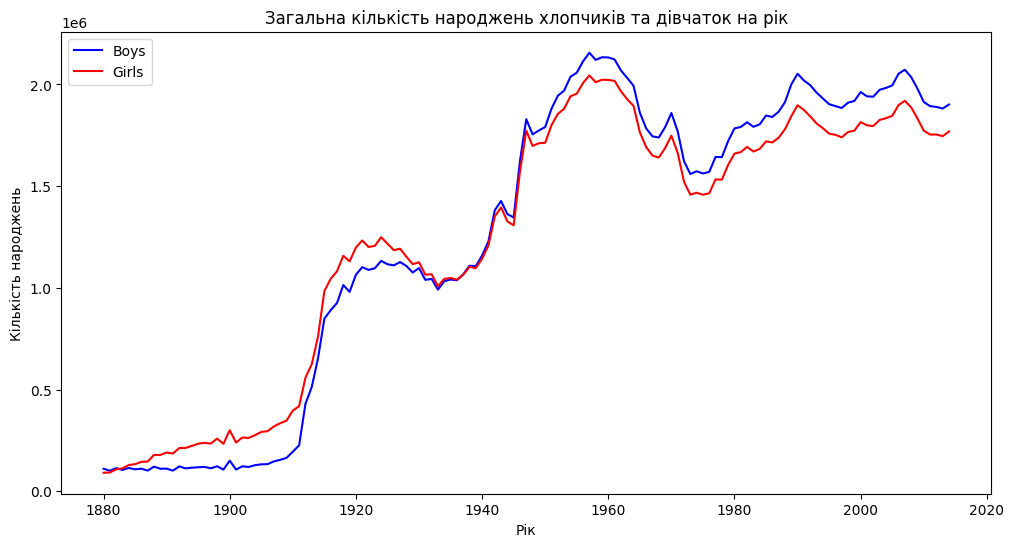

In [58]:
# №19 не сильно правильно в соответствии с рисунком в методичке
import matplotlib.pyplot as plt

# Крок 1: Фільтруємо дані за статтю
boys_data = data[data['Gender'] == 'M']
girls_data = data[data['Gender'] == 'F']

# Крок 2: Групуємо дані за роками та сумуємо кількість
boys_by_year = boys_data.groupby('Year')['Count'].sum().reset_index()
girls_by_year = girls_data.groupby('Year')['Count'].sum().reset_index()

# Крок 3: Побудова графіків
plt.figure(figsize=(12, 6))

# Графік для хлопчиків
plt.plot(boys_by_year['Year'], boys_by_year['Count'], label='Boys', color='blue')

# График для девочек
plt.plot(girls_by_year['Year'], girls_by_year['Count'], label='Girls', color='red')

# Налаштування графіка
plt.title("Загальна кількість народжень хлопчиків та дівчаток на рік")
plt.xlabel("Рік")
plt.ylabel("Кількість народжень")
plt.legend()

# Показати графік
plt.show()



In [59]:
# №20 Групування за іменем і підрахунок унікальних статей для кожного імені
gender_neutral_names = data.groupby('Name')['Gender'].nunique()

# Підрахунок кількості імен, які використовувалися для обох статей
num_gender_neutral_names = (gender_neutral_names == 2).sum()
print(f"{num_gender_neutral_names}")


10221


In [60]:
# №21 Фільтруємо дані за ім'ям 'Barbara' і статтю 'M'
barbara_boys = data[(data['Name'] == 'Barbara') & (data['Gender'] == 'M')]

# Сумуємо кількість у стовпці 'Count'
total_barbara_boys = barbara_boys['Count'].sum()

# Виводимо результат
print(f"{total_barbara_boys}")


4139


In [61]:
# Крок 1: Знайти гендерно-нейтральні імена (імена, які використовуються обома статями в одному році)
neutral_gender_names = df.groupby(['Name', 'Year']).agg(
    Gender_count=('Gender', 'nunique'),
    Total=('Count', 'sum')
).query('Gender_count == 2').reset_index()

# Крок 2: Підрахувати кількість унікальних років у даних
observation_count = df['Year'].nunique()

# Крок 3: Знайти найбільш популярні гендерно-нейтральні імена, які присутні кожного року
most_popular_neutral_gender_names = neutral_gender_names.groupby('Name').agg(
    Year_count=('Year', 'nunique'),
    Total=('Total', 'sum')
).query('Year_count == @observation_count').sort_values(by=['Total'], ascending=False).reset_index()

# Виводимо результат
most_popular_neutral_gender_names[['Name']]


,Name
0,James
1,John
2,Robert
3,William
4,Joseph
5,Jean
6,Jesse
7,Leslie
8,Francis
9,Lee


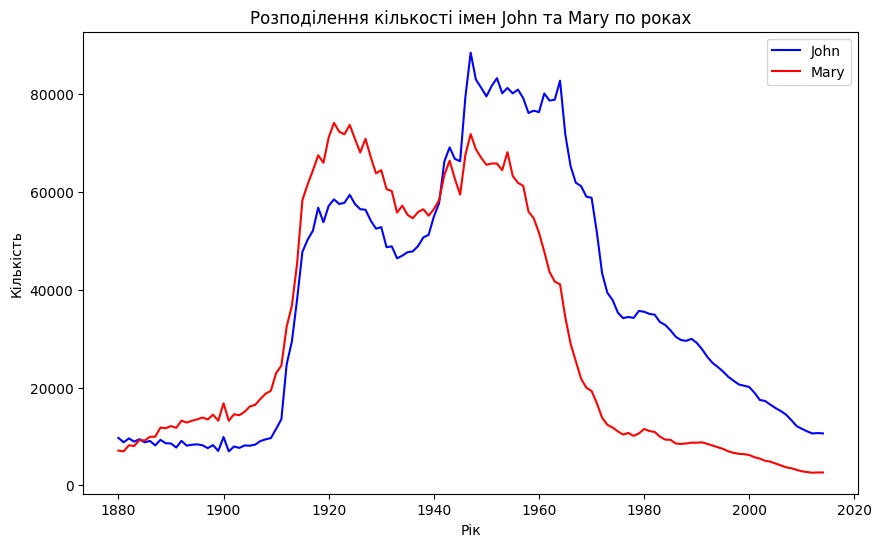

In [62]:
# №25
import matplotlib.pyplot as plt

# Крок 1: Фільтруємо дані за іменами 'John' та 'Mary'
john_data = data[data['Name'] == 'John']
mary_data = data[data['Name'] == 'Mary']

# Крок 2: Групуємо дані за роками та сумуємо кількість
john_by_year = john_data.groupby('Year')['Count'].sum().reset_index()
mary_by_year = mary_data.groupby('Year')['Count'].sum().reset_index()

# Крок 3: Побудова графіків
plt.figure(figsize=(10, 6))

# Графік для імені John
plt.plot(john_by_year['Year'], john_by_year['Count'], label='John', color='blue')

# Графік для імені Mary
plt.plot(mary_by_year['Year'], mary_by_year['Count'], label='Mary', color='red')

# Налаштування графіка
plt.title("Розподілення кількості імен John та Mary по роках")
plt.xlabel("Рік")
plt.ylabel("Кількість")
plt.legend()

# Показати графік
plt.show()


In [63]:
# №27
# Крок 1: Групуємо дані за роками та знаходимо ім'я з максимальним 'Count' у кожному році
most_popular_names_by_year = data.loc[data.groupby('Year')['Count'].idxmax()]


# Крок 2: Обираємо потрібні стовпці для виведення
most_popular_names_by_year = most_popular_names_by_year[['Year', 'Name', 'Count']]

# Крок 3: Виводимо результат
most_popular_names_by_year


,Year,Name,Count
942,1880,John,9655
2938,1881,John,8769
4963,1882,John,9557
7116,1883,John,8894
9318,1884,John,9388
...,...,...,...
1657592,2010,Isabella,22883
1691633,2011,Sophia,21816
1725502,2012,Sophia,22267
1759186,2013,Sophia,21147
